# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. Use this notebook to create your visualizations.

Below we set up the dataframe with the Goodreads dataset for you. If you run this cell, you may get an error that some lines were skipped. Do not worry about that! For this studio, we want to focus on creating an effective

In [6]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("books.csv", error_bad_lines=False)

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


With your dataframe set up, time to start creating visualizations!

In [2]:
# Use your Python skills to create a visualization here.
#Text ratings count vs reviews count in matplotlib
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'year'],
      dtype='object')

In [3]:
def ratings_group (series):
    if series < 100000:
        return "less than 100,000"
    elif 100000 <= series < 200000:
        return "100,000 to 200,000"
    elif 200000 <= series < 300000:
        return "200,000 to 300,000"
    elif 300000 <= series < 400000:
        return "300,000 to 400,000"
    elif 400000 <= series < 500000:
        return "400,000 to 500,000"
    elif 500000 <= series < 600000:
        return "500,000 to 600,000"
    elif 600000 <= series < 700000:
        return "600,000 to 700,000"    
    elif 700000 <= series < 800000:
        return "700,000 to 800,000"
    elif 800000 <= series < 900000:
        return "800,000 to 900,000"
    elif 900000 <= series < 1000000:
        return "900,000 to 1,000,000"
    elif 1000000 <= series:
        return "1,000,000 or more"

df["ratings_group"] = df.ratings_count.apply(ratings_group)
df['ratings_group'].value_counts()

less than 100,000       10771
100,000 to 200,000        175
200,000 to 300,000         66
1,000,000 or more          30
300,000 to 400,000         29
600,000 to 700,000         14
400,000 to 500,000         13
500,000 to 600,000         13
700,000 to 800,000          6
800,000 to 900,000          3
900,000 to 1,000,000        3
Name: ratings_group, dtype: int64

In [4]:
df.drop(df[df['ratings_count'] < 1000000].index, inplace = True)
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,ratings_group
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,"1,000,000 or more"
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,"1,000,000 or more"
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004,"1,000,000 or more"
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt,2003,"1,000,000 or more"
284,865,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,0061122416,9780061122415,eng,197,1631221,55843,5/1/1993,HarperCollins,1993,"1,000,000 or more"


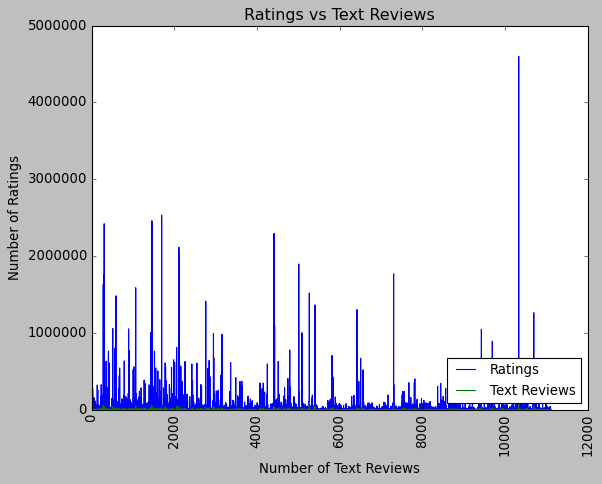

In [15]:
plt.style.use("classic")
fig2 = plt.plot(df['ratings_count'], label = 'Ratings')
plt.plot(df['text_reviews_count'], label = 'Text Reviews')
plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')
plt.title('Ratings vs Text Reviews',color = 'black')
plt.xlabel('Number of Text Reviews',color = 'black')
plt.ylabel('Number of Ratings',color = 'black')
plt.show()

<AxesSubplot:xlabel='text_reviews_count', ylabel='ratings_count'>

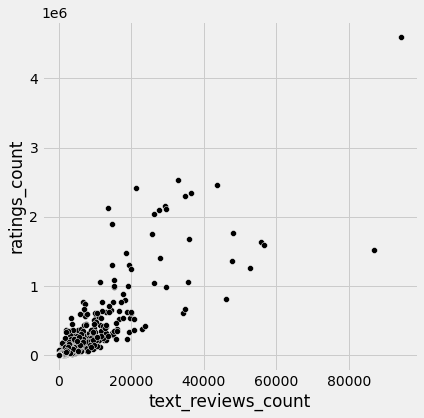

In [10]:
# Use your Python skills to create a visualization here.
#Text ratings count vs reviews count in seaborn
#['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       #'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       #'publication_date', 'publisher', 'year'],
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(
    data=df,
    x="text_reviews_count",
    y="ratings_count",
    color="k",
    ax=ax,
)


In [17]:
def year_group (series):
    if series < 1960:
        return "before 1960"
    elif 1960 <= series < 1980:
        return "1960 to 1980"
    elif 1980 <= series < 2000:
        return "1980 to 2000"
    elif 2000 <= series:
        return "after 2000"
    
df['year'] = df['year'].astype(int)
df["year range"] = df.year.apply(year_group)
df['year range'].value_counts()

after 2000      7698
1980 to 2000    3099
1960 to 1980     276
before 1960       50
Name: year range, dtype: int64